In [26]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import pandas as pd



%matplotlib inline


#assuming the importation of data as pandas data frames before here

#====begin making graph/network====


dfP=pd.read_csv('./data/final.csv')
dfP.rename(columns={'Category':'crimeCount'}, inplace=True)

## set true to draw all of the plots
drawPlots = False;




In [27]:
#Making networks
from networkx.algorithms import bipartite
teamsGraph=nx.Graph()
teams=dfP.team.unique()


for i in teams:
	teamsGraph.add_node(i,team=1,bipartite=0,crimes=-1) #team name

names=dfP.name.unique()	



for name in names:#number of players
  
    nameTemp=dfP[(dfP.name==name)]

    playerCrimes=nameTemp.crimeCount.unique()
  
    crimee=0
    for crim in playerCrimes:
        if crim==1:
            crimee=1
    teamsGraph.add_node(name,crimes=crimee, bipartite=1)
    
    playerTeams=nameTemp.team.unique()
    for team in playerTeams:
        teamsGraph.add_edge(team,name)

		
    


In [28]:
#Actual network analysis


interestNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['bipartite']==0 or m['crimes']==1)]
crimeNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['crimes']==1)]
notCrimeNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['crimes']==0)]

teamNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['crimes']==-1)]
listOfEdges = [edge for edge in teamsGraph.edges()]

## see https://stackoverflow.com/questions/16910538/efficient-extraction-of-a-subgraph-according-to-some-edge-attribute-in-networkx
crimeNet=teamsGraph.subgraph(interestNodes)
crimeEdges= [edge for edge in crimeNet.edges()]
#
#
##cool network analysis 
C=nx.clustering(crimeNet)
B=nx.betweenness_centrality(crimeNet)
crAdjMat=crimeNetAdjMat = nx.adjacency_matrix(crimeNet)
#
#ax(B[ x)
import operator
maxBet=max(B.items(), key=operator.itemgetter(1))[0]
minBet=min(B.items(), key=operator.itemgetter(1))[0]





In [29]:
if drawPlots:
    pos = nx.spring_layout(crimeNet)
    nx.draw_networkx_nodes(crimeNet, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=10)
    nx.draw_networkx_nodes(crimeNet, pos, nodelist=teamNodes, cmap=plt.get_cmap('jet'),node_color = 'g',node_size=10)

    nx.draw_networkx_edges(crimeNet, pos, edgelist=crimeEdges, arrows=False)

In [30]:
if drawPlots:  
    pos = nx.spring_layout(teamsGraph)
    nx.draw_networkx_nodes(teamsGraph, pos, nodelist=notCrimeNodes, cmap=plt.get_cmap('jet'), node_color = 'b',node_size=10)
    nx.draw_networkx_nodes(teamsGraph, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=10)
    nx.draw_networkx_nodes(teamsGraph, pos, nodelist=teamNodes, cmap=plt.get_cmap('jet'),node_color = 'g',node_size=10)
    #nx.draw_networkx_labels(teamsGraph, pos)
    nx.draw_networkx_edges(teamsGraph, pos, edgelist=listOfEdges, arrows=False)
    #plt.figure(figsize=)
    #plt.savefig("fullNet.png", dpi=1000)
    #plt.savefig("fullNet.pdf")
    plt.show()


In [31]:
playerNodes = (notCrimeNodes + crimeNodes)

uniTeamsGraph = bipartite.projected_graph(teamsGraph, playerNodes)

uniEdges = uniTeamsGraph.edges()


In [32]:
if drawPlots:
    pos = nx.spring_layout(uniTeamsGraph)
    nx.draw_networkx_nodes(uniTeamsGraph, pos, nodelist=notCrimeNodes, cmap=plt.get_cmap('jet'), node_color = 'b',node_size=10)
    nx.draw_networkx_nodes(uniTeamsGraph, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=10)
    nx.draw_networkx_edges(uniTeamsGraph, pos, edgelist=uniEdges, arrows=False)


In [33]:
uniCrimesGraph = bipartite.projected_graph(crimeNet, crimeNodes)
uniCrimeEdges = uniCrimesGraph.edges()

if drawPlots:
    nx.draw(uniCrimesGraph)


In [34]:
crimeGraph=nx.Graph()
crimeList = ['Alcohol','Animal Abuse','Assault / Battery', 'DUI','Disorderly conduct','Domestic Violence','Drugs','Gun','License / Traffic','Murder / Manslaughter','Resisting','Sex','Other','Theft / Burglary']

for i in crimeList:
    crimeGraph.add_node(i,issaCrime=1)
    
dfC = dfP[(dfP.crimeCount >= 1)]

for i in dfC.name.unique():
    crimeGraph.add_node(i, issaCrime=0)


def createCrimeNodes(i, row):
    for crime in crimeList:
        if row[crime] >= 1:
            crimeGraph.add_edge(crime, row['name'])
[createCrimeNodes(i, row) for i, row in dfC.iterrows()]

# print(dict([n for n, m in crimeGraph.nodes(data=True) if (m['issaCrime']==1)]))
labels = dict((key, key) for (key, value) in crimeGraph.nodes(data=True) if (value['issaCrime']==1))

crimeNodes =[n for n,m in crimeGraph.nodes(data=True) if (m['issaCrime']==1)]
playNodes =[n for n,m in crimeGraph.nodes(data=True) if (m['issaCrime']==0)]
listOfCrimeEdges= [edge for edge in crimeGraph.edges()]


In [35]:
#printing graph that links players crimes to the crimes
if drawPlots:
    pos = nx.spring_layout(crimeGraph)
    nx.draw_networkx_nodes(crimeGraph, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=20)
    nx.draw_networkx_nodes(crimeGraph, pos, nodelist=playNodes, cmap=plt.get_cmap('jet'),node_color = 'g',node_size=10)
    nx.draw_networkx_edges(crimeGraph, pos, edgelist=listOfCrimeEdges, arrows=False)
    nx.draw_networkx_labels(crimeGraph, pos, labels=labels)



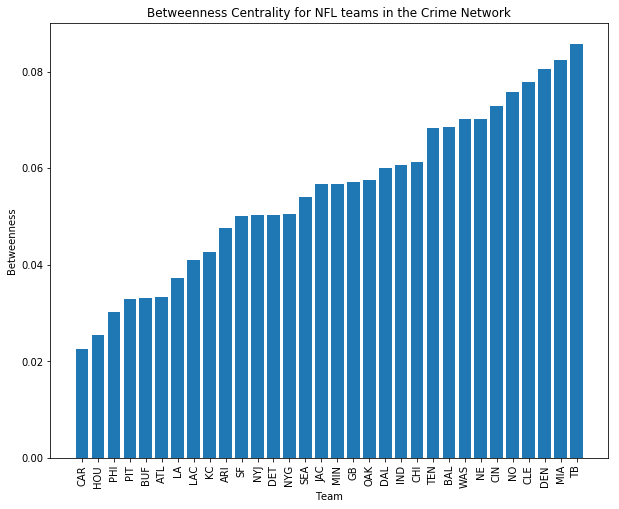

{'ARI': 0.04757009554508282,
 'ATL': 0.03324072636110537,
 'BAL': 0.06859498992981311,
 'BUF': 0.03299743058437477,
 'CAR': 0.022636756723518264,
 'CHI': 0.0611740406080783,
 'CIN': 0.07283298179854884,
 'CLE': 0.07786449142089624,
 'DAL': 0.05999981752101021,
 'DEN': 0.08050177842308252,
 'DET': 0.0503030658818191,
 'GB': 0.05719880706766741,
 'HOU': 0.02546162389227693,
 'IND': 0.06062211197855809,
 'JAC': 0.056609655954029225,
 'KC': 0.04256588661021042,
 'LA': 0.03731902426993251,
 'LAC': 0.04107121002698152,
 'MIA': 0.08237507074290022,
 'MIN': 0.056650467319374107,
 'NE': 0.07015454160442909,
 'NO': 0.07568643489517508,
 'NYG': 0.05054755628978006,
 'NYJ': 0.05026054286874462,
 'OAK': 0.05748045923386013,
 'PHI': 0.030284128341696026,
 'PIT': 0.03282347185213726,
 'SEA': 0.054012402506871005,
 'SF': 0.05000929451671257,
 'TB': 0.08578585555990212,
 'TEN': 0.068406808980963,
 'WAS': 0.07011050599196895}

In [51]:
###Degree centrality by team in crime net
D = crimeNet.degree()
D = dict(D)
degrees = sorted(set(D.values()))
degree_agg = [list(D.values()).count(x) for x in degrees]
    
teamDegrees = {}
for key in list((D))[:32]:
    teamDegrees[key] = D[key]

##identify team nodes for centrality measures
teamNodes = set(n for n,d in crimeNet.nodes(data=True) if d['bipartite']==0)

##Closeness by team in crime net
TC = bipartite.closeness_centrality(crimeNet, teamNodes)

teamCloseness = {}
for key in list((TC))[:32]:
    teamCloseness[key] = TC[key]

##Betweenness by team in crime net
TB = bipartite.betweenness_centrality(crimeNet, teamNodes)

teamBetweenness = {}
for key in list((TB))[:32]:

    teamBetweenness[key] = TB[key]

drawPlots = False
if drawPlots:
    plt.figure(figsize=(10,8))
    plt.plot(degrees, degree_agg)

    plt.legend('')
    plt.ylabel('Number of nodes (Player/Team)')
    plt.xlabel('Degree')
    plt.ylim(1,200)

    plt.title("Degree metrics for Crime Network")
    plt.savefig("DegreeMet.png")
drawPlots = True
sorted_TB = sorted(teamBetweenness.items(), key=operator.itemgetter(1))
sorted_TB = dict(sorted_TB)
if drawPlots:
    plt.figure(figsize=(10,8))
    plt.bar(range(len(sorted_TB)), sorted_TB.values())
    plt.xticks(range(len(sorted_TB)), sorted_TB.keys(), rotation=90)
    plt.title("Betweenness Centrality for NFL teams in the Crime Network")
    plt.ylabel('Betweenness')
    plt.xlabel("Team")
    plt.savefig("BetweenMet.png")
    plt.show()

sorted_TB

In [37]:

playerEigen = nx.eigenvector_centrality_numpy(uniTeamsGraph)



In [38]:
playerDegrees = uniTeamsGraph.degree()
#playerBetweenness = nx.betweenness_centrality(uniTeamsGraph) #takes too long


In [39]:
# not really sure the difference between uniTeamsGraph and teamsGraph but Brady was using uni
#ETG=nx.eigenvector_centrality_numpy(teamsGraph)
#sorted_ETG = sorted(ETG.items(), key=operator.itemgetter(1))
#print(sorted_ETG)

In [40]:
##Metrics to add to data


##takes too long for the wholegraph
##closeness in one-mode graph
#cl = nx.closeness_centrality(uniTeamsGraph)
#bt = nx.betweenness_centrality(uniTeamsGraph)

def matchPlayerNetworkMeasures(name):
    dfP.loc[(dfP.name == name), 'player_Degrees'] = playerDegrees.get(name)
    dfP.loc[(dfP.name == name), 'player_Eigen'] = playerEigen.get(name)
    #dfP.loc[(dfP.name == name), 'player_Betweenness'] = playerBetweenness[team] #takes too long

[matchPlayerNetworkMeasures(name) for name in dfP.name.unique()]


def matchNetworkMeasures(team):
    dfP.loc[(dfP.team == team), 'Team_Degrees'] = teamDegrees[team]
    dfP.loc[(dfP.team == team), 'Team_Closeness'] = teamCloseness[team]
    dfP.loc[(dfP.team == team), 'Team_Betweenness'] = teamBetweenness[team]

[matchNetworkMeasures(team) for team in dfP.team.unique()]

#matchNetworkMeasures('NYJ')

#dfP.loc[(dfP.team == "NYJ"), ['Team_Degrees','Team_Closeness','Team_Betweenness']]

    
dfP.to_csv('./data/final_networked_by_team.csv', index=False)

In [41]:
dfP.head()

,No,name,Age,Pos,G,GS,Wt,Ht,College,BirthDate,...,Disorderly conduct,Sex,Theft / Burglary,Murder / Manslaughter,Animal Abuse,player_Degrees,player_Eigen,Team_Degrees,Team_Closeness,Team_Betweenness
0,45.0,Josh Baker,25.0,NaN,11.0,0.0,244.0,75.0,"Delware, Northwest Missouri State",725365.0,...,NaN,NaN,NaN,NaN,NaN,452.0,0.006007,33.0,0.369705,0.050261
1,34.0,Chris Smith,24.0,NaN,3.0,0.0,186.0,70.0,"Highland J.C., Northern Illionois",725545.0,...,NaN,NaN,NaN,NaN,NaN,979.0,0.013362,27.0,0.362264,0.037319
2,26.0,Tramaine Brock,23.0,NaN,11.0,0.0,197.0,70.0,"Mississippi Gulf Coast J.C.,Bellhaven",725969.0,...,NaN,NaN,NaN,NaN,NaN,419.0,0.005294,36.0,0.367816,0.050009
3,26.0,Tramaine Brock,24.0,NaN,16.0,0.0,197.0,70.0,"Mississippi Gulf Coast J.C.,Bellhaven",725969.0,...,NaN,NaN,NaN,NaN,NaN,419.0,0.005294,36.0,0.367816,0.050009
4,26.0,Tramaine Brock,25.0,RCB,16.0,7.0,197.0,70.0,"Mississippi Gulf Coast J.C.,Bellhaven",725969.0,...,NaN,NaN,NaN,NaN,NaN,419.0,0.005294,36.0,0.367816,0.050009


In [42]:
#null checking
null_columns=dfP.columns[dfP.isnull().any()]
dfP[null_columns].isnull().sum()

No                         403
Age                          6
Pos                      11362
GS                          32
Wt                           7
Ht                       32467
College                     18
BirthDate                    6
AV                           1
Draft_Team                9506
Draft_Round               9506
Draft_Pick                9506
Draft_Year                9529
crimeCount               32603
DUI                      32603
Other                    32603
Drugs                    32603
Domestic Violence        32603
Resisting                32603
Assault / Battery        32603
Gun                      32603
Alcohol                  32603
License / Traffic        32603
Disorderly conduct       32603
Sex                      32603
Theft / Burglary         32603
Murder / Manslaughter    32603
Animal Abuse             32603
dtype: int64